# Final Project

# New York City Rat Infestation Through the Lense of Data

## Introduction:
New York City has a rat problem, and some believe it has gotten out of hand. Between 2010 and 2019 there have been over 130,000 rat sightings in New York City (https://www.forbes.com/sites/adamandrzejewski/2019/05/25/a-new-york-city-rat-invasion-130000-reported-rat-sightings-since-2010/#3fa6d51934d6). Rodents have taken over the city and the results are worrying. It was reported by Winnie Hu in her New York Times article, that the tables have turned (https://www.nytimes.com/2019/05/22/nyregion/rat-infestation-nyc.html). The infestation has gotten to the point where humans tend to find themselves dodging and avoiding the rodents as opposed to the scurrying away at the sound of footsteps.

## Narrative:

Myself and my team have been hired by the State of New York to resolve the rat infestation which plagues the city and surrounding buroughs. As a data analyst I am working alongside the exterminators in order to come up with an effective plan to resolve the issue.


## Research Questions:
This project will analyze public data to get a better understanding of the rat problem. The goal will be to dig down to the core and discover possible causes for this infestation. 

- What affect does weather have on the number of sightings?
    - Do rats tend to come into the public in certain weather?
- Where are the rat sightings most common?
    - Which area of New York City are the rats sightings the highest.

## Data to be Used:
- https://www.kaggle.com/new-york-city/nyc-rat-sightings/download
    - Data will be uploaded by CSV from Github and stored in a pandas DataFrame. This data will serve as the main dataset for this project and will be joined with other necessary datasets for analysis. The data will be analyzed using summary statistics and bar plots. It will then be used in conunction with other data sets and analyzed based off the new information for further insights.

- Weather API:
    - https://darksky.net/dev
    - Data will be accessed from Darksky API using Python and uploaded to a Pandas DataFrame. The data will then be combined with the rat sighting data to identify any trends. Data will be used with rat sightings data based on location in an attempt to find relationship between weather and rat sightings.


In order to answer the research questions above we will use the data to create a thorough analysis of rat sightings in New York City. The "nyc rat sightings" (https://www.kaggle.com/new-york-city/nyc-rat-sightings/download) data will be used to to locate areas with higher number of reports. The data will be analyzed using summary statistics and bar plots. I will constrcut geo plots which overlay a map of rat sightings on differet breakups of the city, such as zip code, borough, street. The crime data will also help identify how the residents of a community treat their surroudnings. This data will then be analyzed to see if there is a relationship between weather/temperature and number of rat sightings.

***

### Library Importing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML

### Data Importing:

In [2]:
# import rat sighting data from CSV on github
rats_df =pd.read_csv(r'https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Fall/Datasets/Rat_Sightings%202.csv')

In [3]:
rats_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31464015,09/04/2015 12:00:00 AM,09/18/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10006.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.707772,-74.012963,"(40.70777155363643, -74.01296309970473)"
1,31464024,09/04/2015 12:00:00 AM,10/28/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Commercial Building,10306.0,2270 HYLAN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.575209,-74.104547,"(40.575209242947444, -74.1045465185469)"
2,31464025,09/04/2015 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,10310.0,758 POST AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.631236,-74.126878,"(40.63123555151668, -74.12687759748677)"
3,31464026,09/04/2015 12:00:00 AM,09/14/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11206.0,198 SCHOLES STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.708987,-73.941207,"(40.70898692345805, -73.94120690238431)"
4,31464027,09/04/2015 12:00:00 AM,09/22/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,10462.0,2138 WALLACE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.854130,-73.864813,"(40.85413014360452, -73.86481331044513)"


## Data Preprocessing:

### Dealing with NA values:

In [4]:
# function which lists total number of Nan Values for each column
def nas_sorted(df):
    return df.isnull().sum().sort_values(ascending = False)

In [5]:
sorted_nas = nas_sorted(rats_df)

In [6]:
sorted_nas

Vehicle Type                      101914
Road Ramp                         101914
School or Citywide Complaint      101914
Facility Type                     101914
Taxi Company Borough              101914
Bridge Highway Name               101914
Bridge Highway Direction          101914
Taxi Pick Up Location             101914
Bridge Highway Segment            101914
Garage Lot Name                   101914
Ferry Direction                   101914
Ferry Terminal Name               101914
Landmark                          101879
Intersection Street 1              92989
Intersection Street 2              92989
Cross Street 2                     16690
Cross Street 1                     16657
Closed Date                        10931
Street Name                         9075
Incident Address                    9074
School Not Found                     917
Location                             706
Longitude                            706
X Coordinate (State Plane)           706
Y Coordinate (St

In [7]:
# drop column if entire column is Nan
def drop_empty(df):
    df.dropna(axis = 1, how='all', inplace = True)

In [8]:
drop_empty(rats_df)
rats_df.shape

(101914, 40)

In [9]:
sorted_nas = nas_sorted(rats_df)

In [10]:
sorted_nas

Landmark                          101879
Intersection Street 1              92989
Intersection Street 2              92989
Cross Street 2                     16690
Cross Street 1                     16657
Closed Date                        10931
Street Name                         9075
Incident Address                    9074
School Not Found                     917
Y Coordinate (State Plane)           706
Location                             706
Longitude                            706
Latitude                             706
X Coordinate (State Plane)           706
Address Type                         346
City                                 342
Incident Zip                         336
Due Date                             117
Location Type                          6
Resolution Action Updated Date         3
Community Board                        0
Created Date                           0
School Zip                             0
Agency                                 0
Agency Name     

In [11]:
# https://stackoverflow.com/questions/23197324/pandas-value-counts-applied-to-each-column
# function that prints each column with the number of unique values in each column
def show_value_count(df):
    for c in df.columns:
        print("---- %s ---" % c)
        print(len(df[c].value_counts()))

In [12]:
show_value_count(rats_df)

---- Unique Key ---
101914
---- Created Date ---
9041
---- Closed Date ---
11507
---- Agency ---
1
---- Agency Name ---
1
---- Complaint Type ---
1
---- Descriptor ---
1
---- Location Type ---
20
---- Incident Zip ---
191
---- Incident Address ---
51601
---- Street Name ---
6744
---- Cross Street 1 ---
4644
---- Cross Street 2 ---
4729
---- Intersection Street 1 ---
2436
---- Intersection Street 2 ---
2434
---- Address Type ---
5
---- City ---
100
---- Landmark ---
21
---- Status ---
5
---- Due Date ---
101756
---- Resolution Action Updated Date ---
32256
---- Community Board ---
68
---- Borough ---
6
---- X Coordinate (State Plane) ---
37439
---- Y Coordinate (State Plane) ---
43460
---- Park Facility Name ---
1
---- Park Borough ---
6
---- School Name ---
1
---- School Number ---
1
---- School Region ---
1
---- School Code ---
1
---- School Phone Number ---
1
---- School Address ---
1
---- School City ---
1
---- School State ---
1
---- School Zip ---
1
---- School Not Found ---
1
---

In [13]:
# function that drops any column in dataframe that has 1 or less unique values
def drop_one_value(df):
    for c in df.columns:
        if len(df[c].value_counts()) <= 1:
            df.drop(c,axis = 1,inplace = True)

In [14]:
drop_one_value(rats_df)

In [15]:
show_value_count(rats_df)

---- Unique Key ---
101914
---- Created Date ---
9041
---- Closed Date ---
11507
---- Location Type ---
20
---- Incident Zip ---
191
---- Incident Address ---
51601
---- Street Name ---
6744
---- Cross Street 1 ---
4644
---- Cross Street 2 ---
4729
---- Intersection Street 1 ---
2436
---- Intersection Street 2 ---
2434
---- Address Type ---
5
---- City ---
100
---- Landmark ---
21
---- Status ---
5
---- Due Date ---
101756
---- Resolution Action Updated Date ---
32256
---- Community Board ---
68
---- Borough ---
6
---- X Coordinate (State Plane) ---
37439
---- Y Coordinate (State Plane) ---
43460
---- Park Borough ---
6
---- Latitude ---
58124
---- Longitude ---
58122
---- Location ---
58124


In [16]:
# create dataframe of all columns with more then one value that are useful
rats_df = rats_df[[
'Created Date',
'Location Type',
'Incident Zip',
'Incident Address',
'Street Name',
'City',
'Status',
'Due Date',
'Community Board',
'Borough',
'Latitude',
'Longitude',
'Location'    
]]

In [17]:
sorted_nas = nas_sorted(rats_df)

In [18]:
sorted_nas

Street Name         9075
Incident Address    9074
Location             706
Longitude            706
Latitude             706
City                 342
Incident Zip         336
Due Date             117
Location Type          6
Borough                0
Community Board        0
Status                 0
Created Date           0
dtype: int64

In [19]:
rats_df[["Created Date","Due Date"]] = rats_df[["Created Date", "Due Date"]].apply(pd.to_datetime)
rats_df.shape

(101914, 13)

In [20]:
rats_df['Date'] = [d.date() for d in rats_df['Created Date']]
rats_df = rats_df.drop(['Created Date','Due Date'], axis = 1)

In [21]:
# move last column to front
cols = rats_df.columns.tolist()
cols = cols[-1:] + cols[:-1]
cols

['Date',
 'Location Type',
 'Incident Zip',
 'Incident Address',
 'Street Name',
 'City',
 'Status',
 'Community Board',
 'Borough',
 'Latitude',
 'Longitude',
 'Location']

In [22]:
rats_df = rats_df[cols]
rats_df.shape

(101914, 12)

In [23]:
rats_df['Date'] = pd.to_datetime(rats_df['Date'], errors='coerce')
rats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101914 entries, 0 to 101913
Data columns (total 12 columns):
Date                101914 non-null datetime64[ns]
Location Type       101908 non-null object
Incident Zip        101578 non-null float64
Incident Address    92840 non-null object
Street Name         92839 non-null object
City                101572 non-null object
Status              101914 non-null object
Community Board     101914 non-null object
Borough             101914 non-null object
Latitude            101208 non-null float64
Longitude           101208 non-null float64
Location            101208 non-null object
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 9.3+ MB


***

### Filter for 2016:

As a result of the size of the data set and the limitations on the number of API pulls per a day, the date range was limited to only 2016

In [24]:
start_date = '2015-12-31'
end_date = '2017-01-1'

In [25]:
mask = (rats_df['Date'] > start_date) & (rats_df['Date'] <= end_date)

In [26]:
dates_df = rats_df.loc[mask]
len(dates_df)

17248

In [27]:
# seperate Date column into month,day columns
dates_df['month'] = pd.DatetimeIndex(dates_df['Date']).month
dates_df['day'] = pd.DatetimeIndex(dates_df['Date']).day
#df['day_of_week'] = df['Date'].dt.dayofweek

/Users/avimarcus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/avimarcus/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


***

## EDA:

In [28]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

In [30]:
# number of reported rat sightings per month for 2016
dates_df.groupby(['month']).size().reset_index(name='counts')

,month,counts
0,1,962
1,2,1044
2,3,1261
3,4,1284
4,5,1813
5,6,1840
6,7,1769
7,8,1854
8,9,1775
9,10,1524


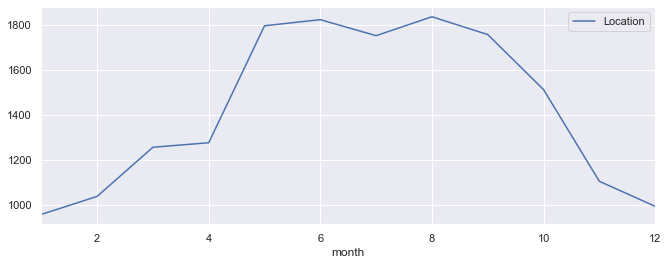

In [31]:
# number of reported rat sightings per month for 2016
dates_df.groupby(['month']).count()[['Location']].plot()

The most rat sightings appear to occur in the middle of the year, between May and September with peaks in May and September and lows in January and December. These months are also the summer months. Could summer and temperature have an affect on the number of sightings?

In [ ]:
#Please use personal API KEY

#packages
import requests # to make calls
import pandas as pd #to make dataframe once calls are done
from datetime import timedelta, date # to formate dates for calls
import time as ti #for introducing delay in script
#base api url
url = 'https://api.darksky.net/forecast/'
#key 
api = 'API KEY'

#location of ny 
NY_Location = '40.7188,-74.0115'

start_date = date(2016,1,1) #inclusive
end_date = date(2017,1,1) #exclusive
time='T12:00:00' #required for call set to midday
#length
days = [start_date + timedelta(n) for n in range((end_date-start_date).days)]
data = []

for day in days:
    call = f'{url}{api}/{NY_Location},{day.isoformat()}{time}?exclude=hourly,minutely,currently'
    re = requests.get(call)
    record = re.json()['daily']['data']
    record[0]['date'] = day
    data.append(record[0])
    ti.sleep(.25)

ny_weather = pd.DataFrame(data)

#https://github.com/jacoblgoodman/DAV-5400/blob/master/final/weather_api_2018.py

In [ ]:
#ny_weather.to_csv('NY_weather.csv', index = False )

In [34]:
ny_weather = pd.read_csv(r'https://raw.githubusercontent.com/AVIMARCUS6/DAV-5400/master/Fall/Final%20Project/NY_weather.csv',infer_datetime_format = True)
ny_weather.head()

,time,summary,icon,sunriseTime,sunsetTime,moonPhase,precipIntensity,precipIntensityMax,precipProbability,temperatureHigh,...,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,date,precipIntensityMaxTime,precipType,precipAccumulation
0,1451624400,Overcast throughout the day.,partly-cloudy-day,1451650860,1451684400,0.75,0.0,0.0,0.0,40.85,...,42.48,1451624400,30.15,1451707200,40.13,1451631540,2016-01-01,NaN,NaN,NaN
1,1451710800,Mostly cloudy throughout the day.,partly-cloudy-day,1451737260,1451770860,0.78,0.0,0.0,0.0,40.32,...,40.32,1451767800,29.31,1451727600,36.55,1451779680,2016-01-02,NaN,NaN,NaN
2,1451797200,Clear throughout the day.,clear-day,1451823660,1451857320,0.81,0.0,0.0,0.0,45.42,...,45.42,1451842140,31.51,1451808360,41.74,1451844000,2016-01-03,NaN,NaN,NaN
3,1451883600,Clear throughout the day.,partly-cloudy-day,1451910060,1451943780,0.84,0.0,0.0,0.0,30.29,...,36.39,1451883600,1.68,1451960820,35.89,1451883600,2016-01-04,NaN,NaN,NaN
4,1451970000,Clear throughout the day.,clear-day,1451996460,1452030180,0.87,0.0,0.0,0.0,29.88,...,29.88,1452026820,-3.54,1451991900,26.78,1452035520,2016-01-05,NaN,NaN,NaN


In [35]:
# Select only necessary columns to display time and temperature. 
ny_weather = ny_weather[['time','summary','temperatureMax','temperatureMin']]
ny_weather

,time,summary,temperatureMax,temperatureMin
0,1451624400,Overcast throughout the day.,42.48,34.40
1,1451710800,Mostly cloudy throughout the day.,40.32,31.77
2,1451797200,Clear throughout the day.,45.42,31.02
3,1451883600,Clear throughout the day.,36.39,14.70
4,1451970000,Clear throughout the day.,29.88,10.59
...,...,...,...,...
361,1482814800,Partly cloudy throughout the day.,60.55,40.52
362,1482901200,Overcast throughout the day.,40.67,30.72
363,1482987600,Light rain in the morning and afternoon.,45.63,29.71
364,1483074000,Partly cloudy throughout the day.,40.48,33.65


In [36]:
ny_weather = ny_weather.rename(columns={"time": "Date"})

In [37]:
ny_weather['Date'] = pd.to_datetime(ny_weather['Date'], unit ='s',).dt.date

In [38]:
ny_weather['Date'] = ny_weather['Date'].astype('datetime64[D]')

In [39]:
ny_weather.set_index('Date', inplace= True)

***

In [40]:
merge_df = dates_df.merge(ny_weather, on='Date')

In [41]:
df = merge_df.copy()

In [42]:
df.to_csv('merged_df.csv', index = False )

***

In [43]:
df.head()

,Date,Location Type,Incident Zip,Incident Address,Street Name,City,Status,Community Board,Borough,Latitude,Longitude,Location,month,day,summary,temperatureMax,temperatureMin
0,2016-01-01,Vacant Lot,10473.0,808 HARDING PARK,HARDING PARK,BRONX,Pending,Unspecified BRONX,BRONX,40.806742,-73.857150,"(40.80674160706358, -73.85715046762321)",1,1,Overcast throughout the day.,42.48,34.4
1,2016-01-01,Other (Explain Below),11230.0,1541 E 19TH ST,E 19TH ST,BROOKLYN,Closed,Unspecified BROOKLYN,BROOKLYN,40.612525,-73.954813,"(40.612525046508665, -73.95481274111293)",1,1,Overcast throughout the day.,42.48,34.4
2,2016-01-01,1-2 Family Dwelling,10312.0,70 RAMONA AVENUE,RAMONA AVENUE,STATEN ISLAND,Closed,03 STATEN ISLAND,STATEN ISLAND,40.541135,-74.188306,"(40.541135407737606, -74.18830591469624)",1,1,Overcast throughout the day.,42.48,34.4
3,2016-01-01,3+ Family Apt. Building,10128.0,245 EAST 87 STREET,EAST 87 STREET,NEW YORK,Closed,08 MANHATTAN,MANHATTAN,40.778895,-73.951252,"(40.778894916233135, -73.95125159946573)",1,1,Overcast throughout the day.,42.48,34.4
4,2016-01-01,Vacant Lot,11232.0,358 43 STREET,43 STREET,BROOKLYN,Assigned,07 BROOKLYN,BROOKLYN,40.650892,-74.009348,"(40.650891966208945, -74.0093482505519)",1,1,Overcast throughout the day.,42.48,34.4


In [44]:
df.shape

(17230, 17)

In [45]:
# Create average temperature column
df['avg_temp'] = ((df['temperatureMax']+df['temperatureMin'])/2).round()

In [46]:
# See only unique average temperatures
df['avg_temp'].unique()

array([38., 36., 26., 20., 29., 35., 44., 50., 33., 30., 40., 46., 25.,
       23., 32., 31., 28., 39., 45., 42., 47., 34., 21., 15.,  8., 24.,
       37., 49., 52., 54., 58., 69., 55., 53., 51., 41., 59., 48., 60.,
       71., 56., 57., 63., 64., 61., 62., 66., 73., 80., 77., 79., 78.,
       74., 76., 67., 75., 72., 65., 70., 82., 68., 81., 84., 83., 87.,
       86., 85., 88., 43., 27., 22.])

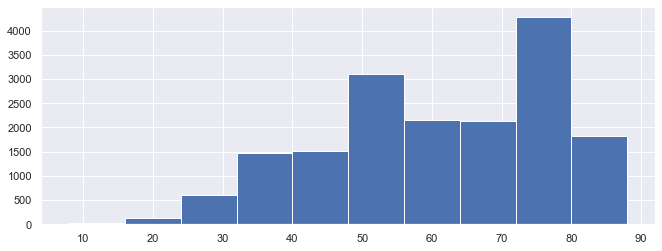

In [47]:
df['avg_temp'].hist()

As shown by the histogram, as temperature rises the number of rat sightings seems to increase slightly as well.

***

In [48]:
date_index = df.set_index('Date').copy()
m_avg = date_index.resample('M').mean()
m_avg = m_avg[['temperatureMax','temperatureMin','avg_temp']]

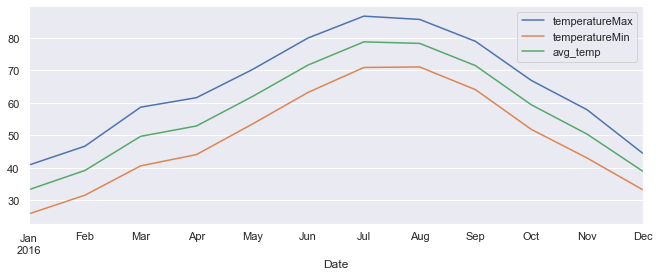

In [49]:
m_avg.plot()

It appears that the highest average temperatures, both min and max for each month lie between May and September as well.

***

### How does weather effect rat sightings?

In [50]:
# create dataframe of df grouped by avg_temp and with count of each avg_temp value occurance in data
weather_sighting_df = df.groupby('avg_temp')[['Location']].count()

In [51]:
# reset index
weather_sighting_df.reset_index(inplace=True)

In [52]:
# rename count column to 'num_of_sightings'
weather_sighting_df.rename(columns={'Location':'num_of_sightings'},inplace=True)

In [53]:
# list columns in weather_sighting_df
weather_sighting_df.columns

Index(['avg_temp', 'num_of_sightings'], dtype='object')

In [54]:
# see only unique num_of_sightings values
weather_sighting_df["num_of_sightings"].unique()

array([ 19,  13,  41,  29,  37,  25,  89,  77,  55,  46, 102, 155,  80,
       191, 212, 105, 136, 161, 354, 214, 127,  95, 199, 174, 273, 278,
        94, 265, 218, 420, 374, 327, 631, 291, 530, 287, 122, 224, 222,
       367, 399, 233, 373, 188, 342, 217, 378, 186, 159, 344,  52, 435,
       472, 588, 633, 693, 527, 622, 391, 307, 198, 511, 372, 319, 131,
       116,  65,  33,  63])

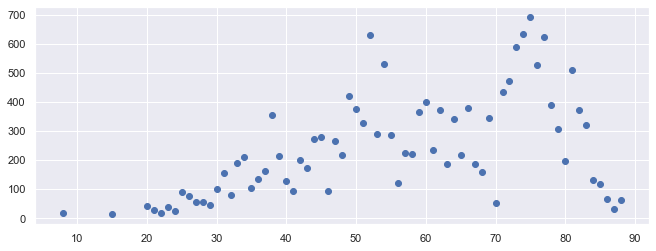

In [55]:
plt.scatter(weather_sighting_df.avg_temp,weather_sighting_df.num_of_sightings)
plt.show()

The scatter plot appears to show a strong positive relationship between lower temperatues and rat sightings, which weakens as the temperature rises. In summary, there appears to be a weak positive relationship between temperature and number of reported rat sightings.

### How strong is the relationship?

- ### Simple Linear Regression Model:
    - The affect of weather on number of right sightings

In [56]:
# building simple linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression
X = weather_sighting_df[['avg_temp']]

y = weather_sighting_df['num_of_sightings']

In [57]:
reg = LinearRegression().fit(X, y)

In [58]:
print(reg.score(X, y))

0.2643869156143802


- R^2: the goodness of fit, between 0 and 1. The goodness of fit for this model is 26.44%
- Only 26.44% of variance in number of sightings is explained by the avg_temperature variable.

In [59]:
print(reg.coef_)

[4.30441212]


- With a degree increase in temperature the number of sightings in New York increases by 4.3 units.

In [60]:
print(reg.intercept_)

13.278295033614853


- When there is Zero degree temperature the number of sightings in New York State is 13.28 as per the data. 

#### Single Linear Regression Conclusion:
It appears that although there is a relationship between temperature and number of sightings, only 26.44% of the variance in the number of sightings can be explained by the avg_temperature variable. Therefore temperature does not appear to be a very good estimator for number of sightings. 

***

Perhaps location, specifically Boroughs will enhance the model and give more accurate results.

In [61]:
# import image from github of a heatmap made in Tableau of number of rat sightings by borough 
Image(url= "https://github.com/AVIMARCUS6/DAV-5400/blob/master/Fall/Final%20Project/Rat%20Sightings%20by%20Burough.png?raw=true")

This heatmap appears to show that certain buroughs in New York tend to have more rat sightings.

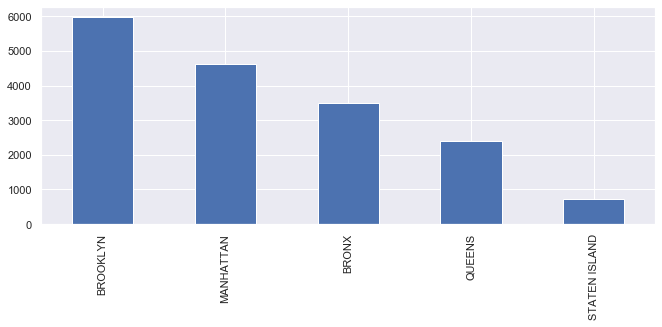

In [62]:
df['Borough'].value_counts().plot.bar()

It appears from the bar plot above that some boroughs, such as Brooklyn or Manhatten appear to have more rat sightings then other locations.

- ### Multi Linear Regeression:
  - The affect of weather and location (burough) on the number of rat sightings  

Data Prep:

In [63]:
weather_sighting_df = df.groupby(['Borough','avg_temp'])[['Location']].count()

In [64]:
weather_sighting_df.reset_index(inplace=True)

In [65]:
weather_sighting_df.rename(columns={'Location':'num_of_sightings'},inplace=True)

In [66]:
weather_sighting_df["num_of_sightings"].unique()

array([ 10,   6,   9,  14,   4,   8,  26,  15,  16,  11,  22,  41,  44,
        46,  32,  33,  87,  56,  35,  18,  50,  63,  70,  54,  51,  85,
        76,  64, 127, 107,  65,  47,  73,  58,  74,  34,  43,  39,  30,
        77,  97, 109, 115, 116, 117,  75,  61,  29, 104,  62,  59,  37,
        17,   5,  13,   2,   1,  21,  12,  28, 103,  23,  68,  98,  89,
        81, 129, 130, 216, 118, 184,  82, 134, 136, 128,  71,  83, 124,
       131, 153, 157, 205, 235, 247, 172, 232, 105, 188, 139,  42,  20,
         7,  57,  72,  86, 143, 194,  99, 100,  96,  84,  52, 123, 162,
       169, 179, 132, 151,  40, 111,  94,  25,  31,   3,  19,  49,  38,
        78,  91,  67,   0,  24,  27])

In [67]:
# create dataframe with dummy variables for borough and drop first borough
regression_df = pd.get_dummies(weather_sighting_df, drop_first=True)

In [68]:
# building multi linear regression model
import numpy as np
from sklearn.linear_model import LinearRegression

x_col = list(regression_df.columns)
x_col.remove('num_of_sightings')

In [69]:
x_col

['avg_temp',
 'Borough_BROOKLYN',
 'Borough_MANHATTAN',
 'Borough_QUEENS',
 'Borough_STATEN ISLAND']

In [70]:
X = regression_df[x_col]

y = weather_sighting_df['num_of_sightings']
reg = LinearRegression().fit(X, y)

Multi Linear Regression Results:

In [71]:
reg.score(X, y)

0.4126266994034135

- 41% of variance in number of sightings is explained by both borough and temperature variables.

In [72]:
reg.coef_

array([  0.8995501 ,  34.67605634,  14.74647887, -15.15492958,
       -40.3673556 ])

- All these variables are not correlated with each other becuase all the weather data is the same for any location in New York.

In [73]:
reg.intercept_

1.5012210195265752

- When the temperature is 0 and the borough is Bronx the number sightings is 3.88.

#### Multi Linear Regression Conclusion:

Where as only 26% of variance was captured by merely using only average temperature, 41% of variance was captured when using temperature and borough. This indicates that the number of sightings also depends on borough.  

## Conclusions:

Based on our analysis we conclude that the best time to put our plan into action can be concluded from the data. We believe that the sighting are higher during the hot seasons in certain locations within New York. This was concluded from the Linear Regression Equations. 
We believe that exterminators should focus on these locations (Brooklyn and Manhattan) during the hot periods (May-September) of the year in order to optimize their results. 


## Challenges:

- Finding the data was easy, accessing the data was the trouble since the API only allowed 1000 pulls per a day. To resolve this isse we were forced to cut down the data to only 2016.
- Ensuring that data was properly cleaned and formatted to achieve a proper merge and statistical analysis. For instance the 'Date' columns in each data frame needed to be of type DateTime.
- If we had more accessible information regarding litter information in New York State, we would have been able to uncover more interesting patterns